# Price Experiment

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

# plt.rcParams["figure.figsize"] = (20,20)

## Different parameters with log normal

In [45]:
np.exp(0.5)

1.6487212707001282

Standard Plot:

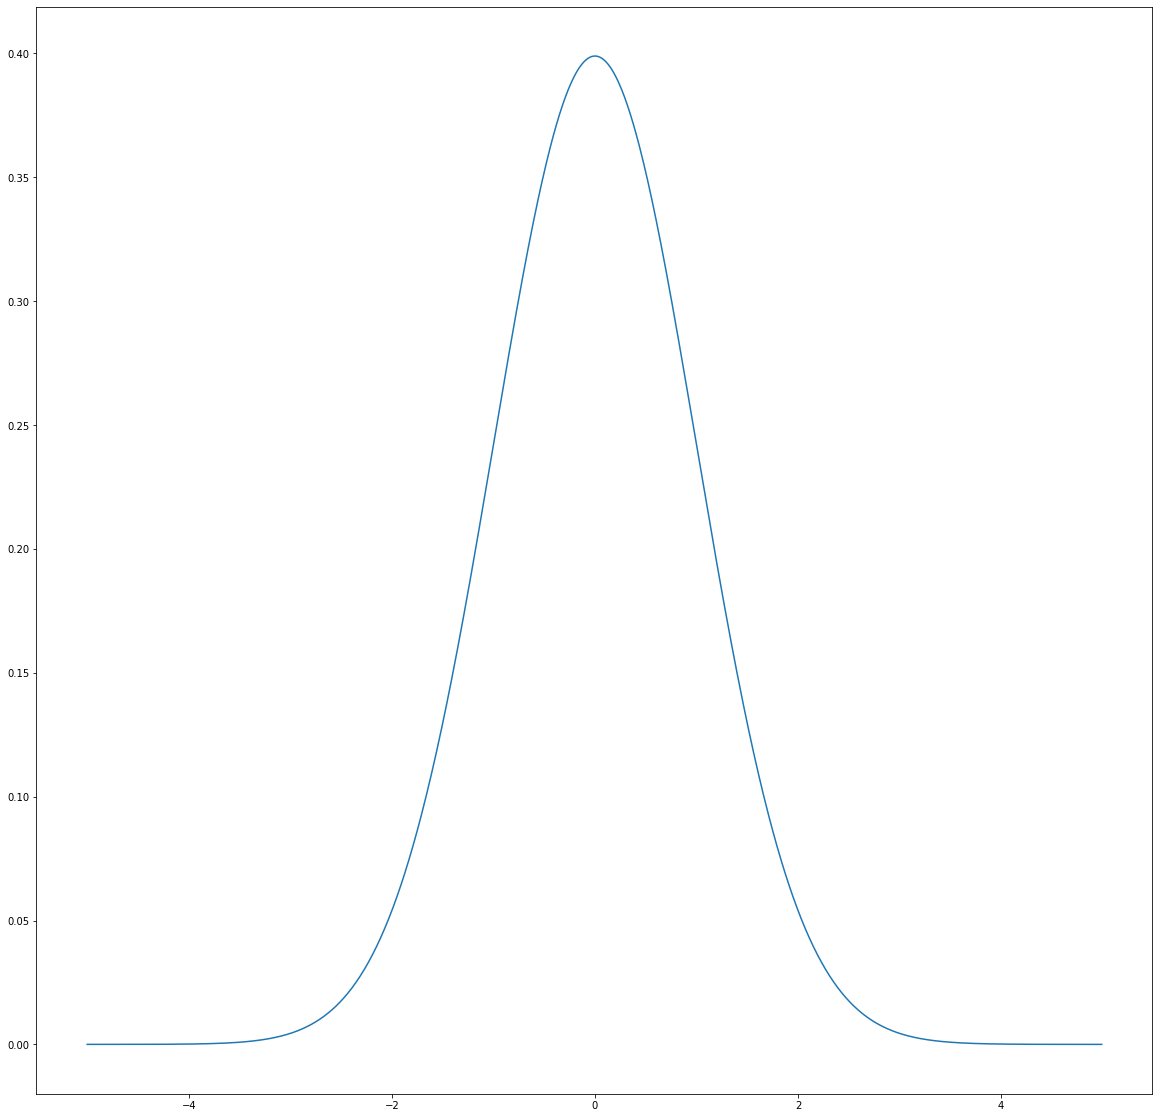

In [46]:
x = np.arange(-5, 5, 0.01)
plt.plot(x, norm.pdf(x))
plt.show()

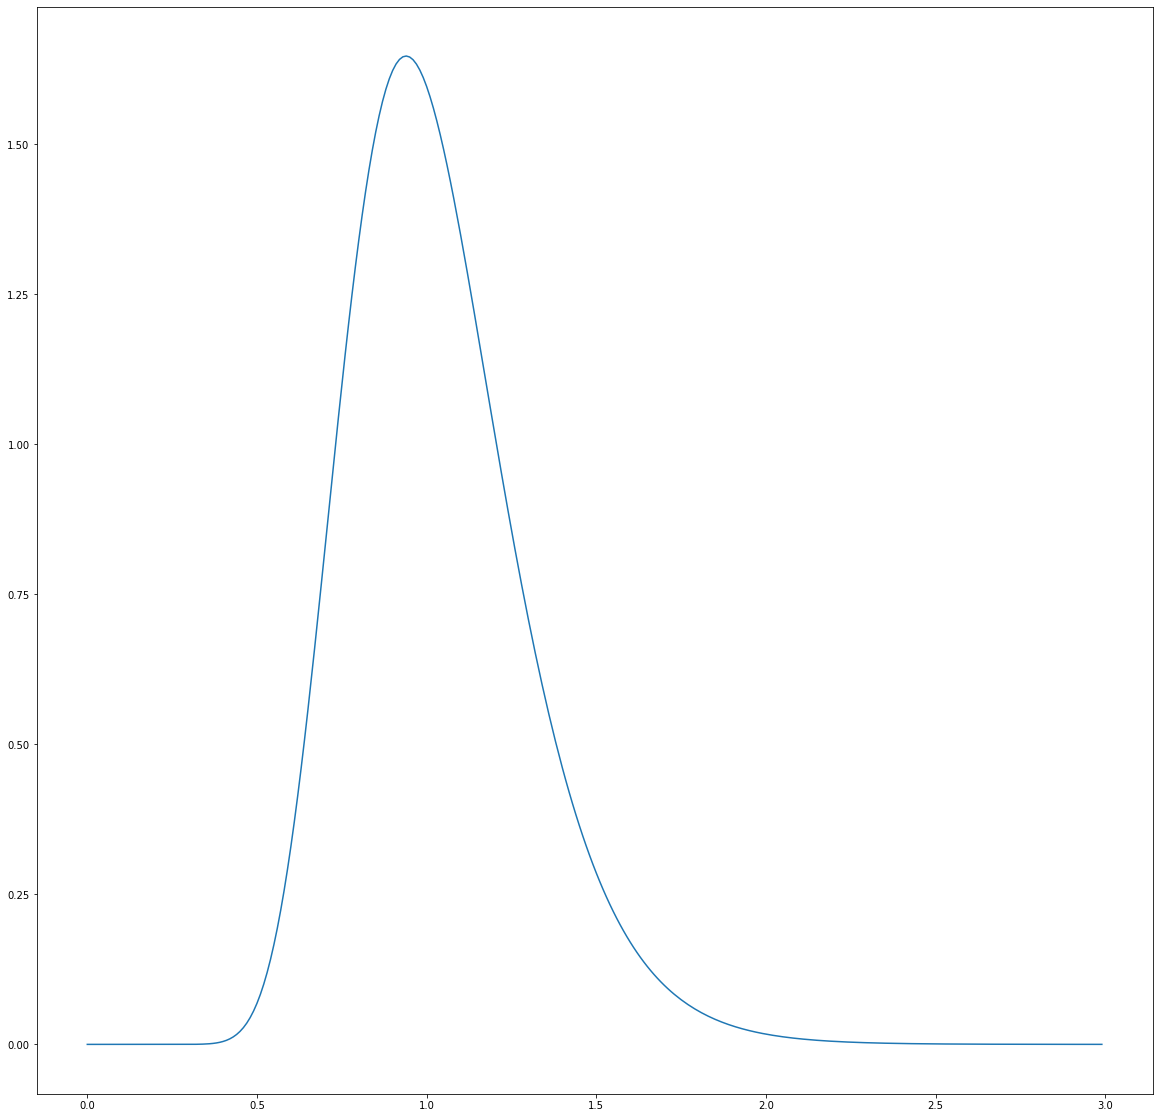

In [47]:
x = np.arange(0.0, 3.0, 0.01)
plt.plot(x, lognorm.pdf(x, s=0.25, loc=0))
plt.show()

Log normal distribution = log(normal distribution), but it is hard to convert back to normal because the log is not a linear transformation

### Different loc value

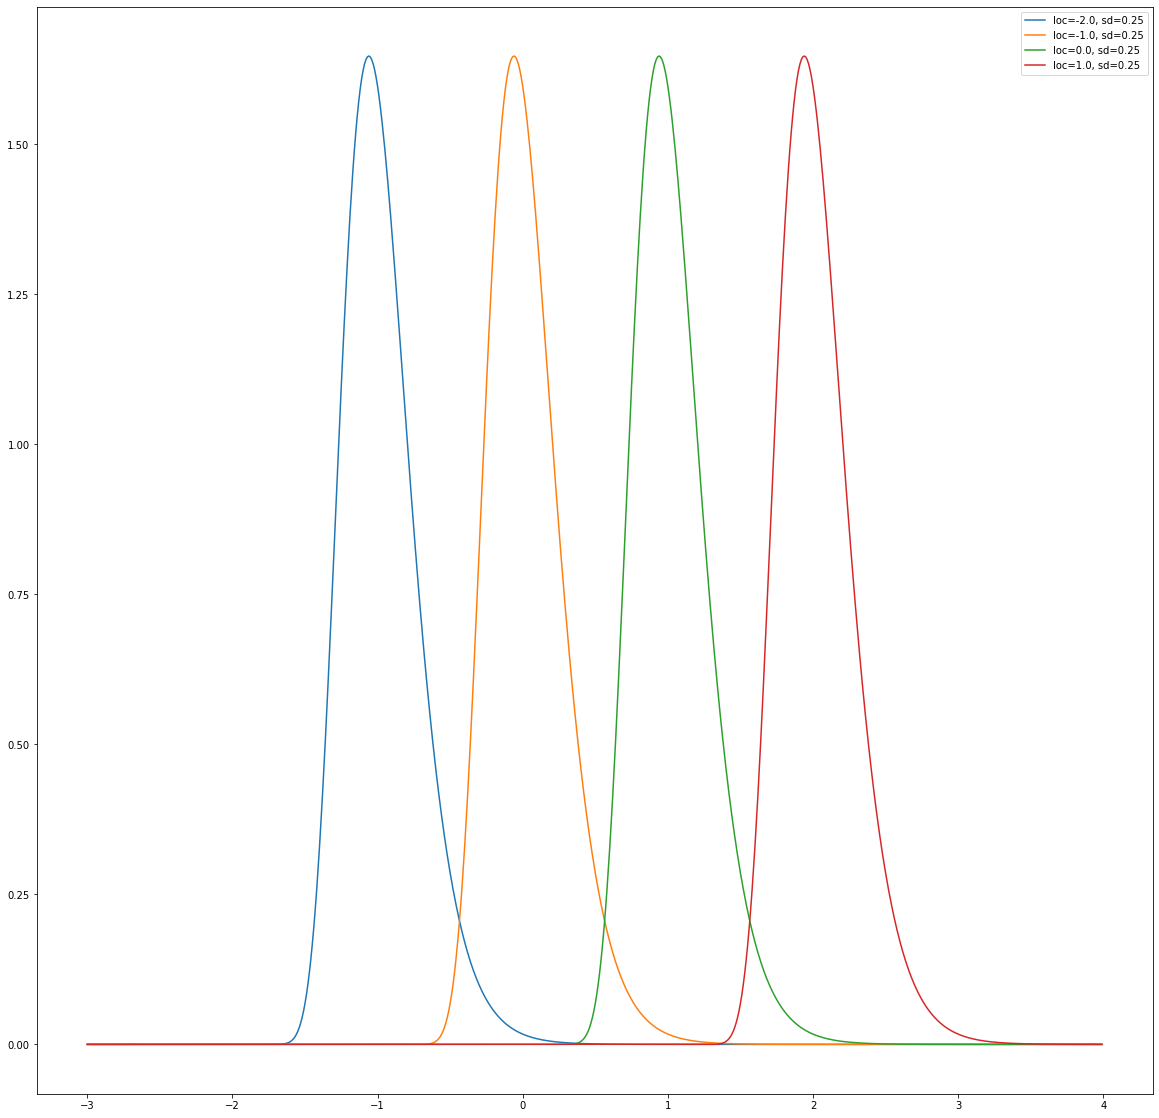

In [48]:
locs = np.arange(-2.0, 2.0, 1.0)
s = 0.25
x = np.arange(-3.0, 4.0, 0.01)

for cur_loc in locs:
    cur_y = lognorm.pdf(x, s=s, loc=cur_loc)
    plt.plot(x, cur_y, label=f"loc={cur_loc}, sd={s}")
plt.legend()
plt.show()

### Different s(var)

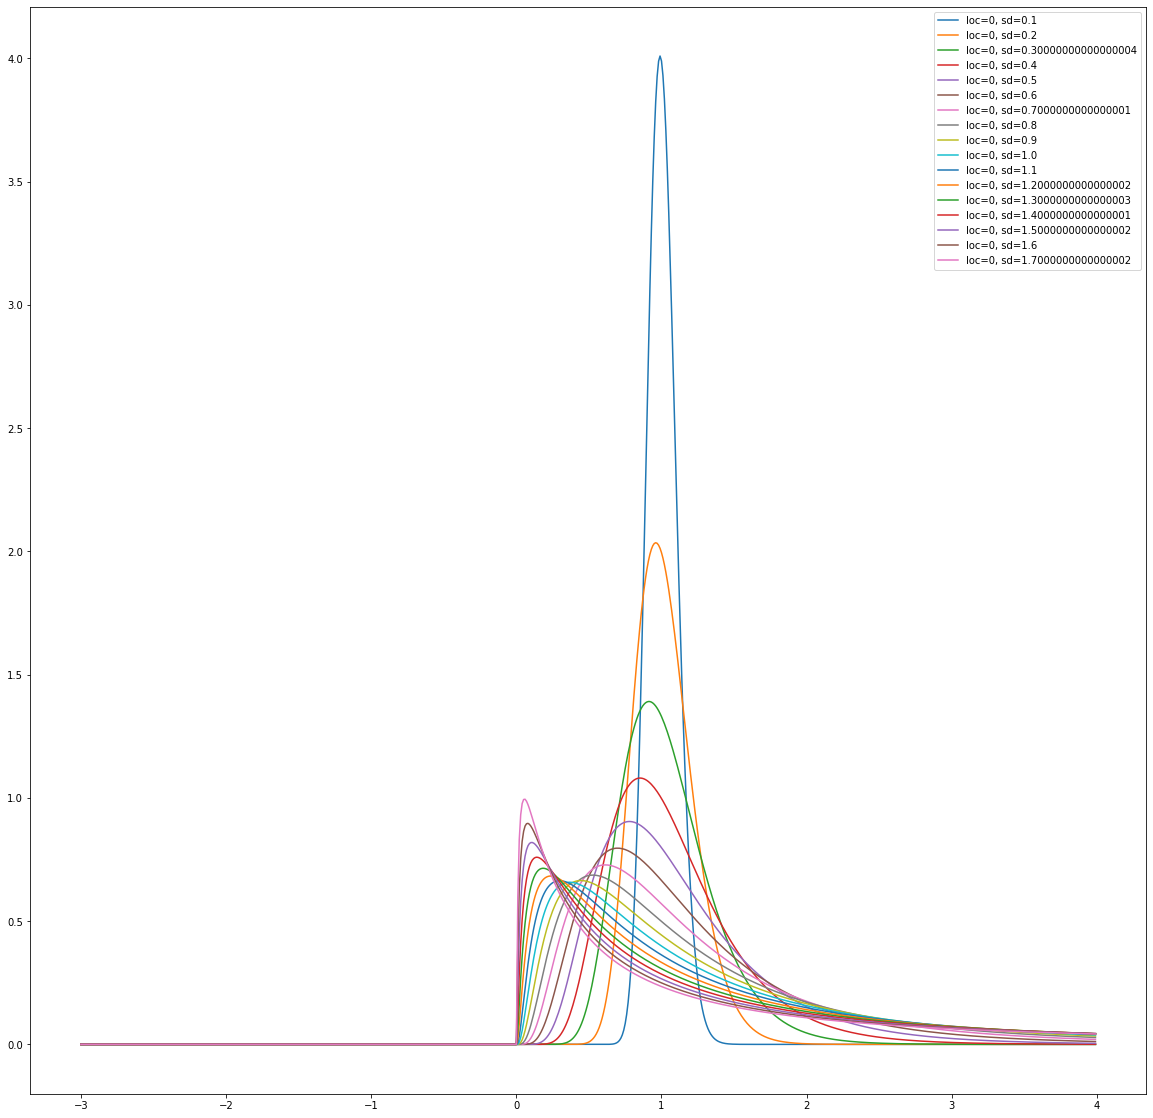

In [57]:
s = np.arange(0.1, 1.8, 0.1)
x = np.arange(-3.0, 4.0, 0.01)

for cur_s in s:
    cur_y = lognorm.pdf(x, s=cur_s)
    plt.plot(x, cur_y, label=f'loc=0, sd={cur_s}')
plt.legend()
plt.show()

Larger than 1.0 the peak will shift to close 0. The more it deviate from 1.0, the higher the peak. 

### Different scales

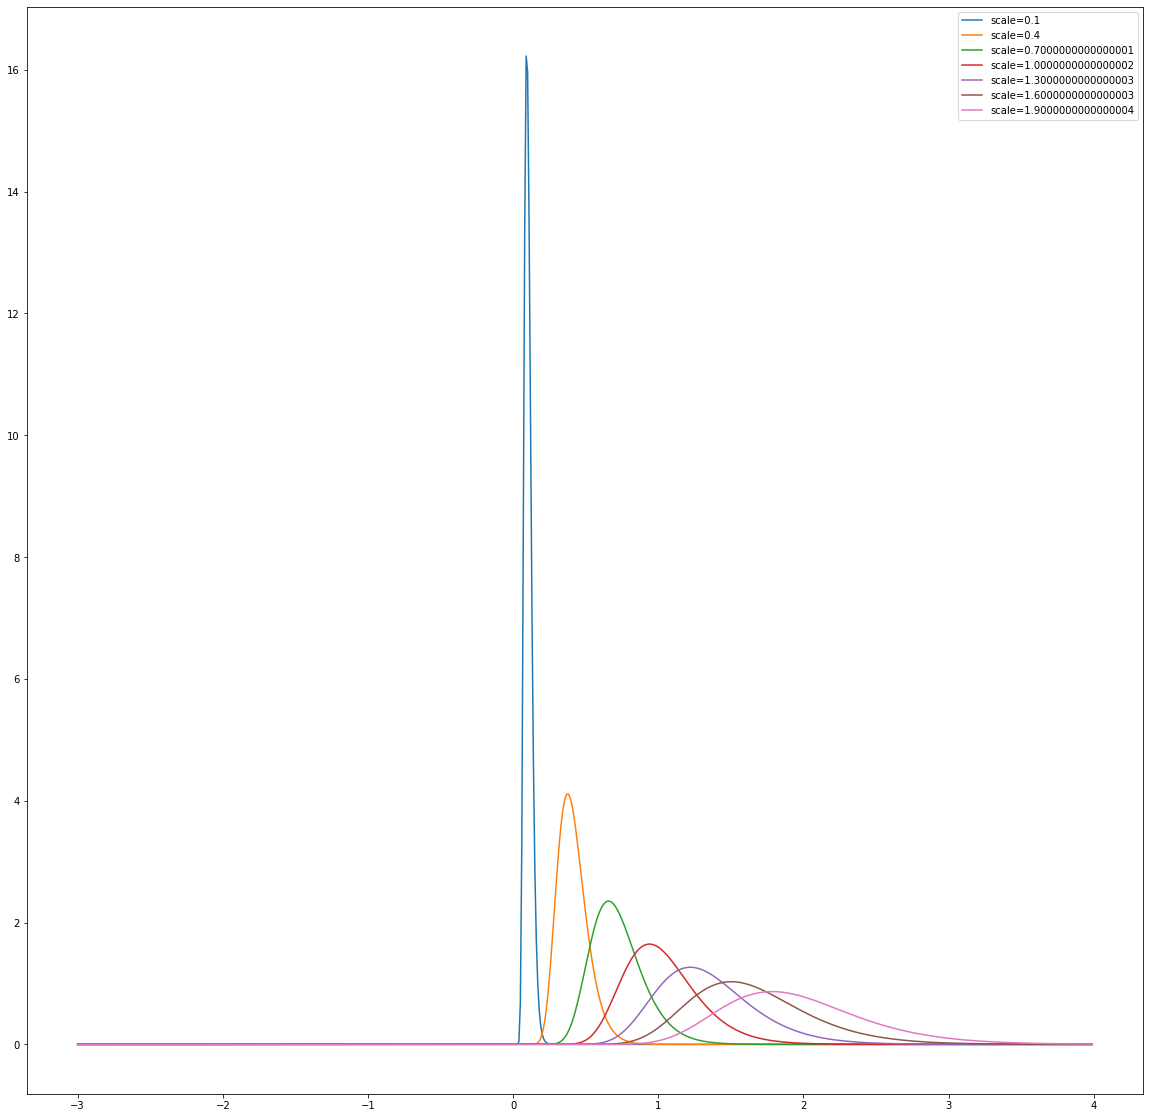

In [65]:
scales = np.arange(0.1, 2.0, 0.3)
x = np.arange(-3.0, 4.0, 0.01)

for cur_scale in scales:
    cur_y = lognorm.pdf(x, s=0.25, scale=cur_scale)
    plt.plot(x, cur_y, label=f'scale={cur_scale}')
plt.legend()
plt.show()

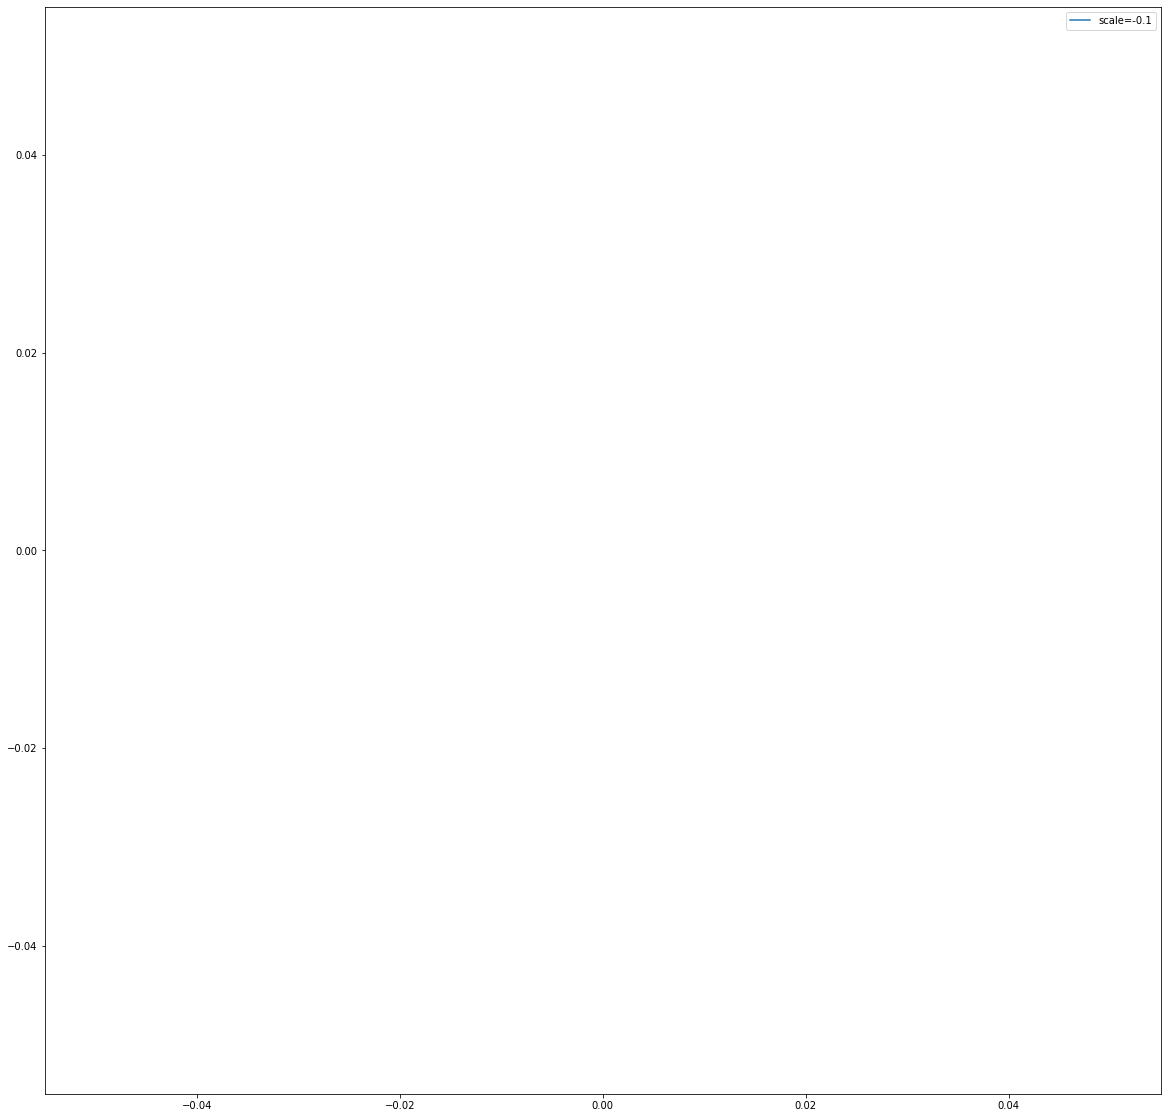

In [66]:
scales = np.arange(-0.1, 0, 0.3)
x = np.arange(-3.0, 4.0, 0.01)

for cur_scale in scales:
    cur_y = lognorm.pdf(x, s=0.25, scale=cur_scale)
    plt.plot(x, cur_y, label=f'scale={cur_scale}')
plt.legend()
plt.show()

Scale can not go negative

## Test Flipped Distribution

### Shifted

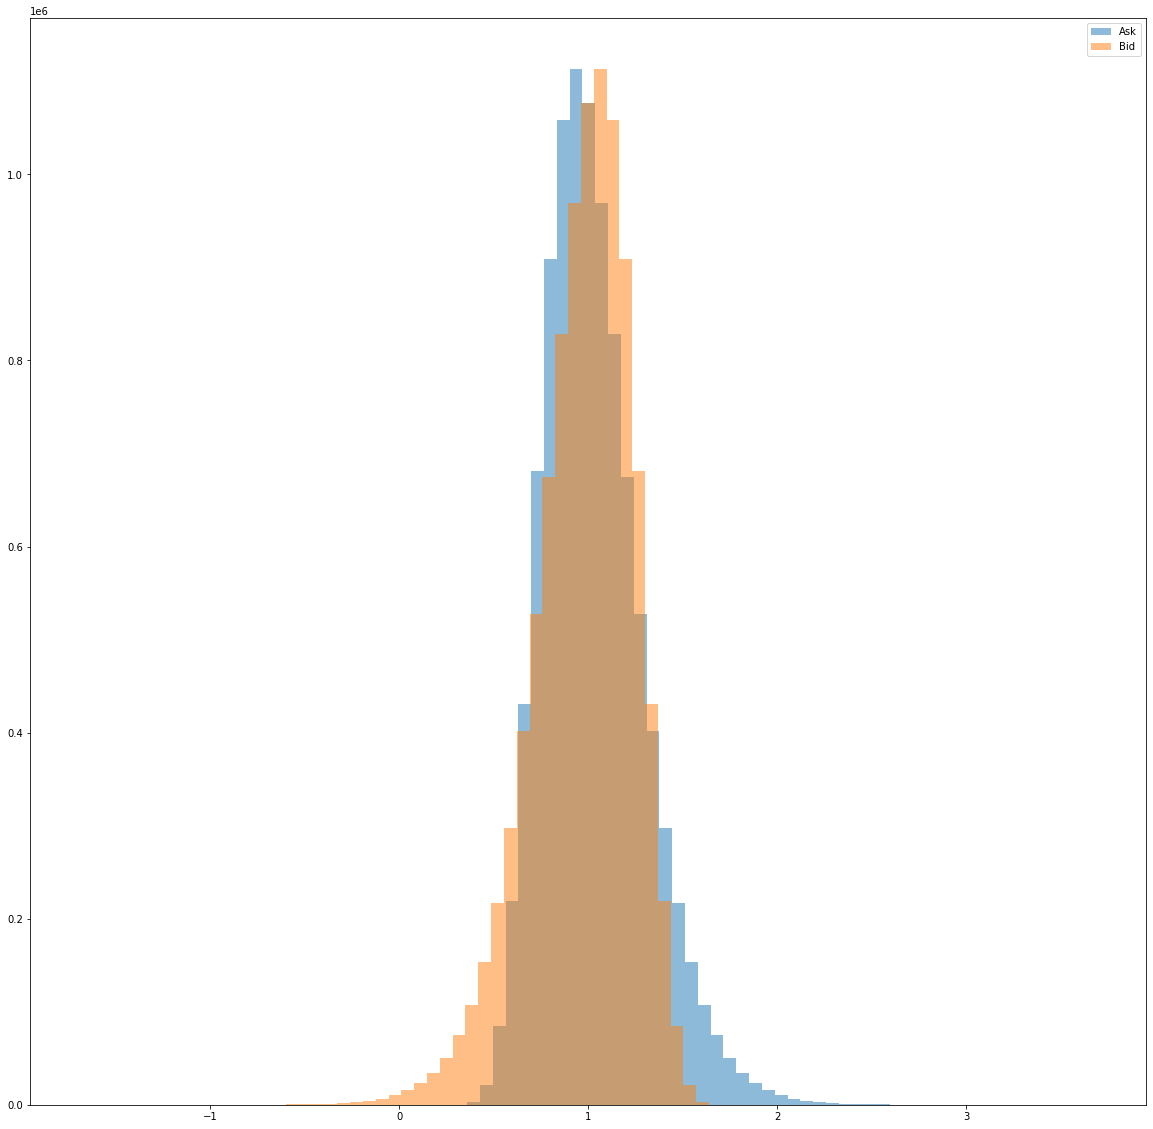

In [12]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

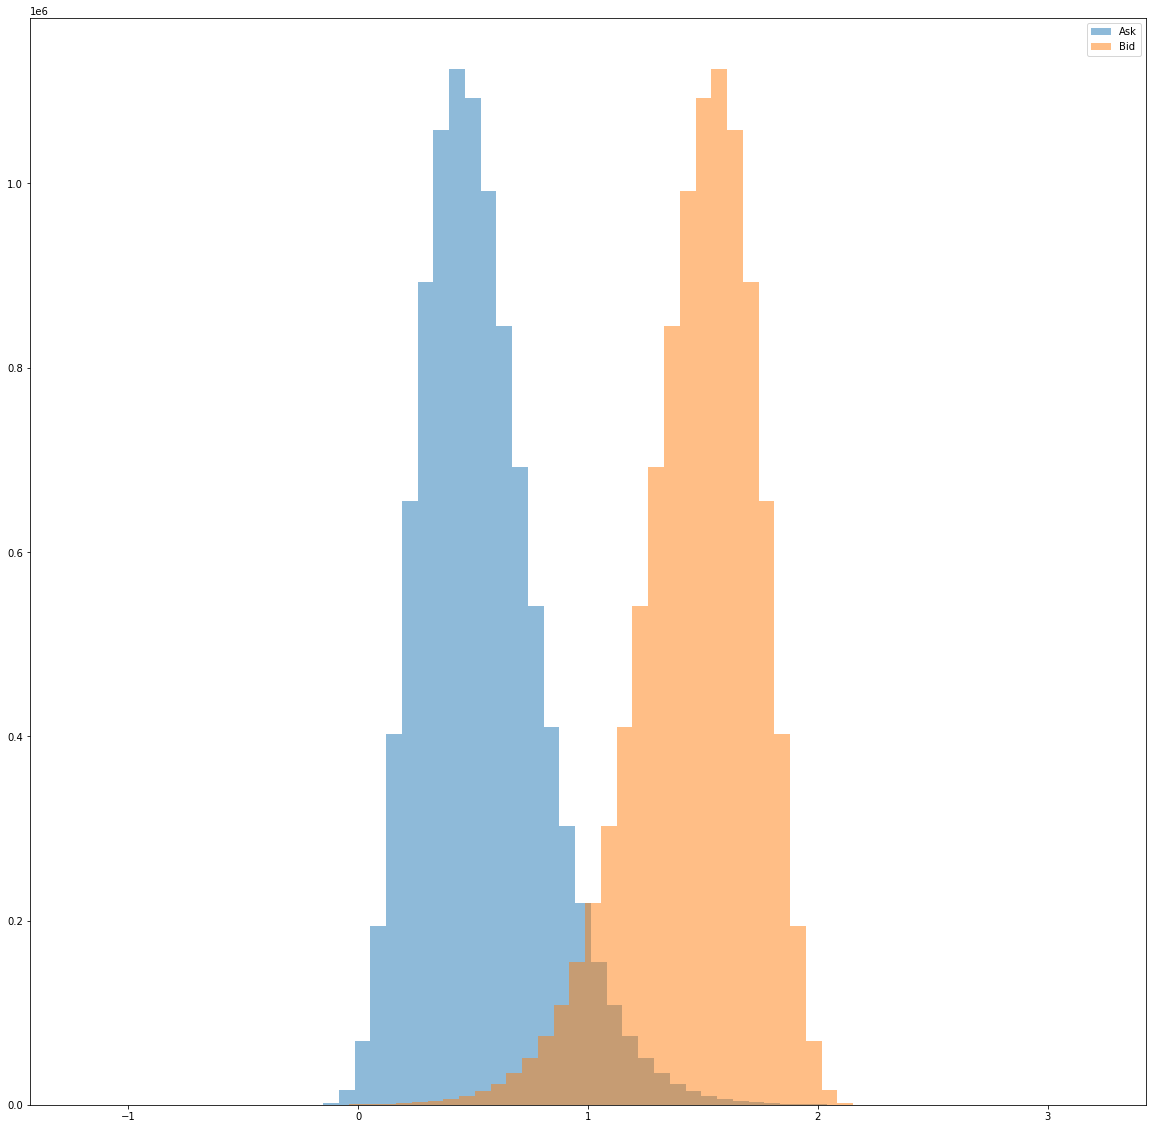

In [15]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num - 0.5

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

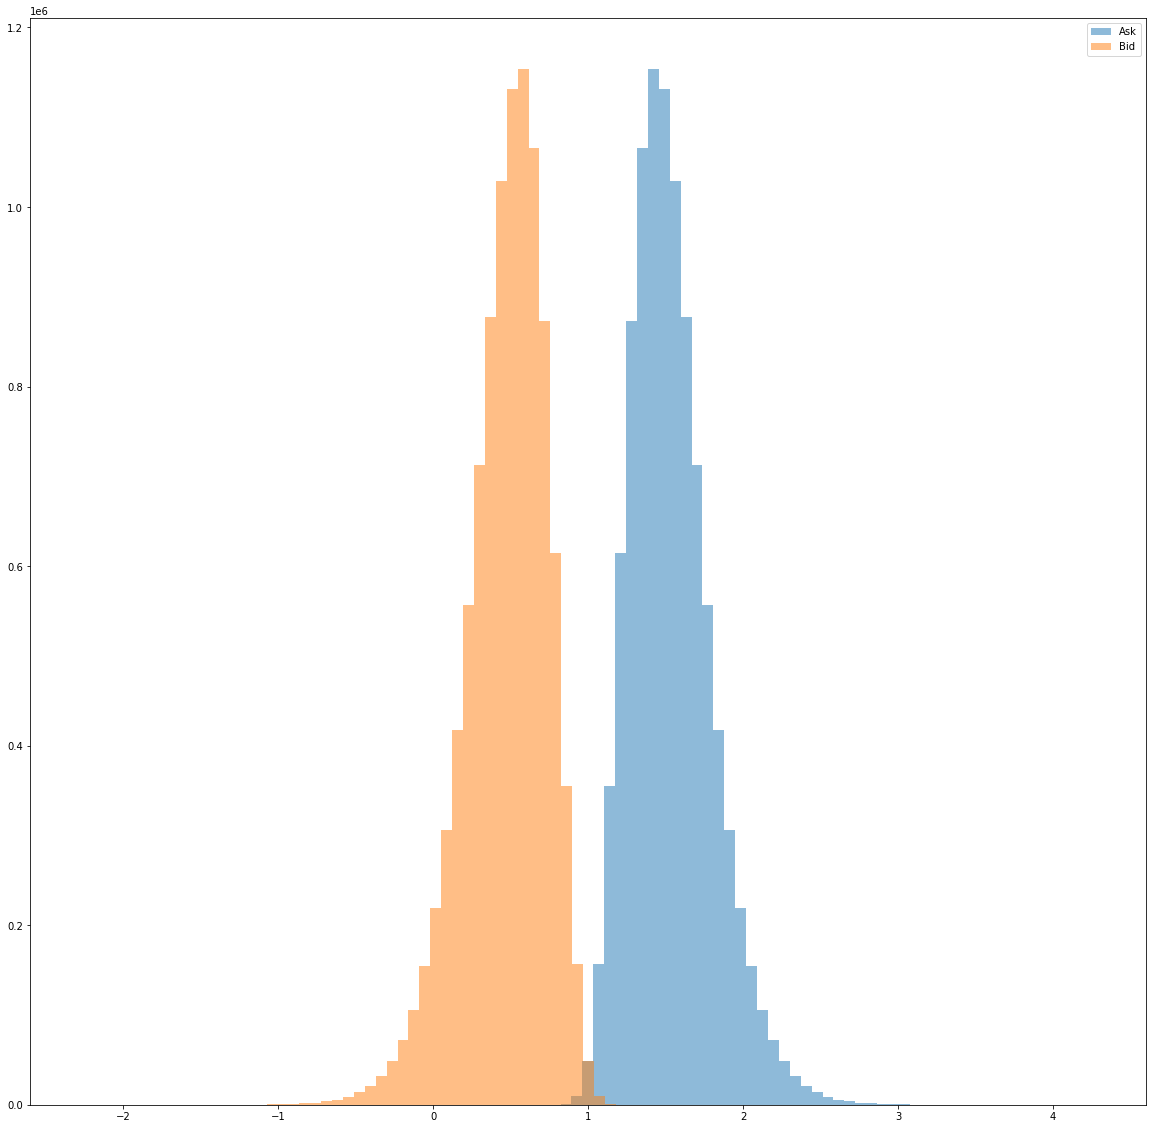

In [16]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=s, size=10_000_000)
random_num = random_num + 0.5

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

### Different Var

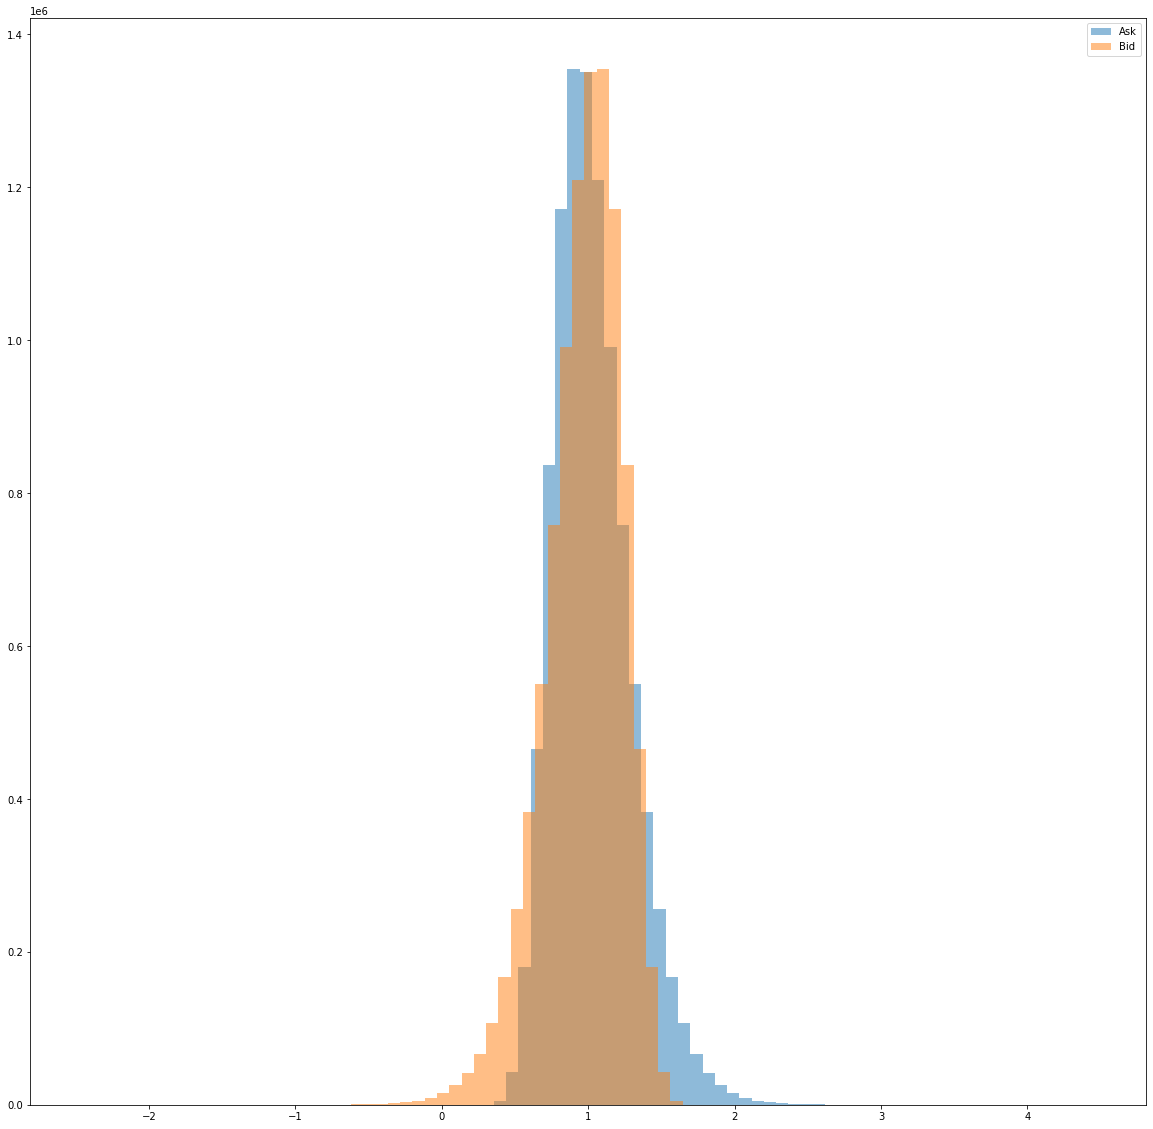

In [17]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

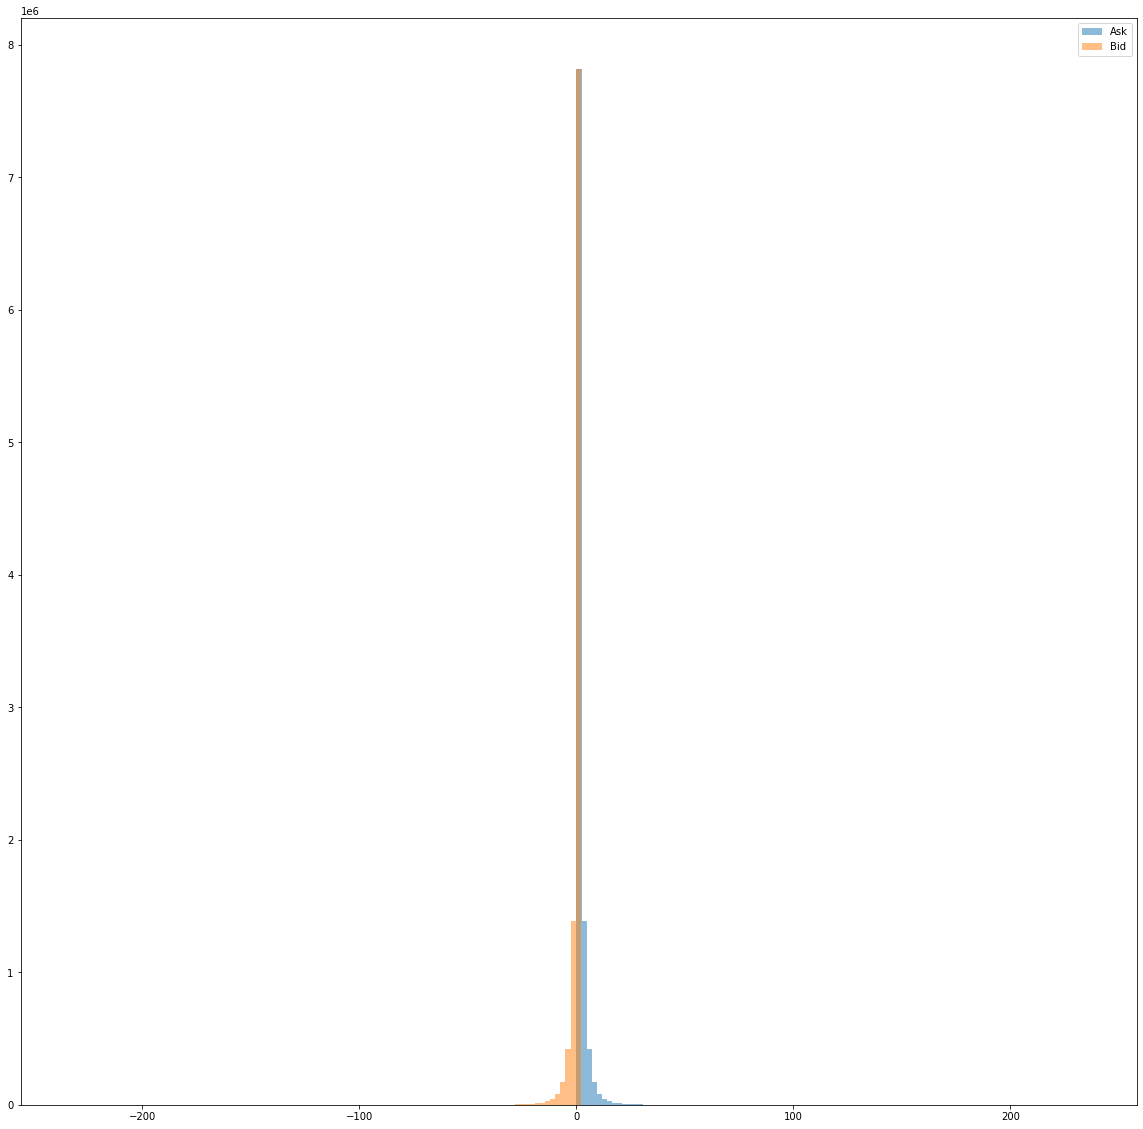

In [20]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=1.1, size=10_000_000)

plt.hist(random_num, bins=100, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=100, alpha=0.5, label="Bid")
plt.legend()
plt.show()

### Different Scales

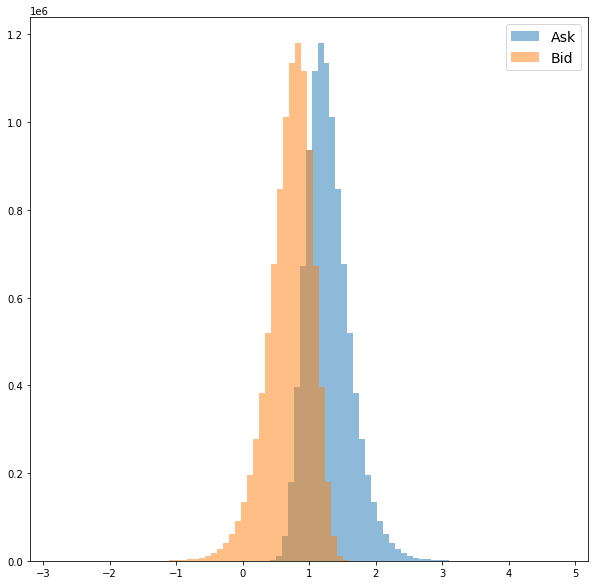

In [18]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num / 0.8

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend(prop={'size': 14})
plt.savefig('result_plots/sampled_order_price.png', dpi=1200)
plt.show()

Truncate the sampling distribution

4.478506084555619
1.9999997030842893
1861297


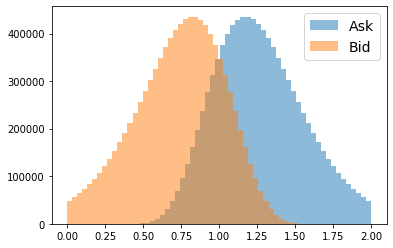

In [2]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num / 0.8

ask_random = random_num[random_num <= 2.0]
bid_random = 2.0 - random_num
bid_random = bid_random[bid_random >=0.0]
print(np.max(random_num))
print(np.max(ask_random))
print(np.sum(random_num < 1.0))

plt.hist(ask_random, bins=50, alpha=0.5, label="Ask")
plt.hist(bid_random, bins=50, alpha=0.5, label="Bid")
plt.legend(prop={'size': 14})
plt.savefig('result_plots/sampled_order_price.png', dpi=1200)
plt.show()

In [23]:
(np.sum(bid_random > 0.5))/ len(bid_random)

0.7909170206455342

In [25]:
np.sum(ask_random < 1.5) / len(ask_random)

0.7909170206455342

5.6178931457907755
1.9999995515542477
768488


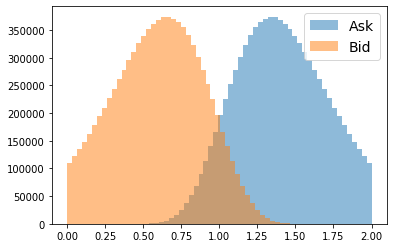

In [20]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num / 0.7

ask_random = random_num[random_num <= 2.0]
bid_random = 2.0 - random_num
bid_random = bid_random[bid_random >=0.0]
print(np.max(random_num))
print(np.max(ask_random))
print(np.sum(random_num < 1.0))

plt.hist(ask_random, bins=50, alpha=0.5, label="Ask")
plt.hist(bid_random, bins=50, alpha=0.5, label="Bid")
plt.legend(prop={'size': 14})
# plt.savefig('result_plots/sampled_order_price.png', dpi=1200)
plt.show()

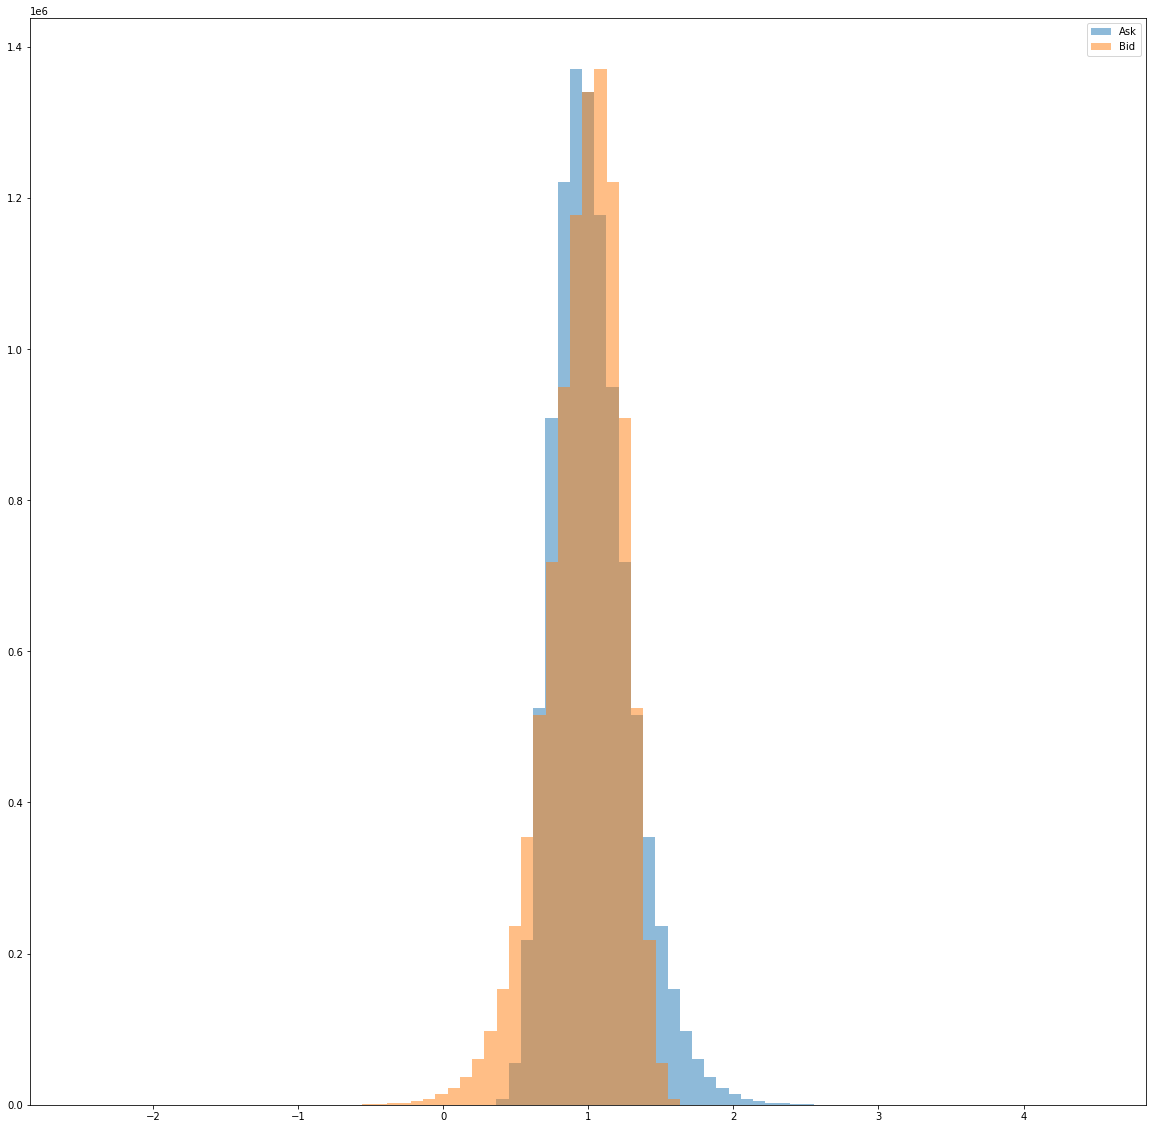

In [29]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num / 1.0

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

In [ ]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)

plt.hist(random_num, bins=50, alpha=0.5, label="Ask")
plt.hist(2.0 - random_num, bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

## Real Price

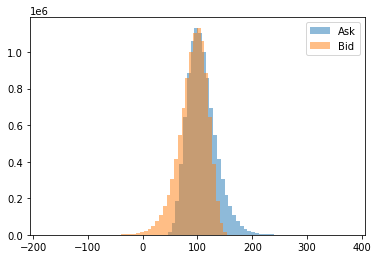

In [2]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num = random_num + 0.05

plt.hist(np.round(100 * random_num, 2), bins=50, alpha=0.5, label="Ask")
plt.hist(np.round(100 * (2.0 - random_num), 2), bins=50, alpha=0.5, label="Bid")
plt.legend()
plt.show()

# Volume Experiment

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import lognorm, norm

No handles with labels found to put in legend.


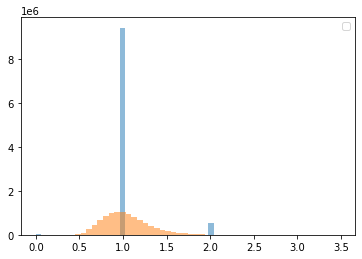

In [6]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=0.25, size=10_000_000)
random_num_rounded = np.round(random_num)
plt.hist(random_num_rounded, bins=50, alpha=0.5)
plt.hist(random_num, bins=50, alpha=0.5)
plt.legend()
plt.show()

Difference between level 1 and 2: 947


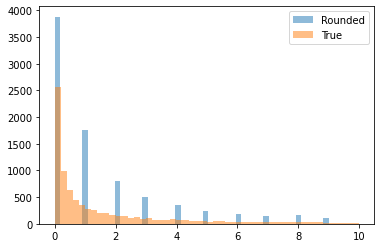

In [27]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=2.5, size=10_000)
random_num_rounded = np.round(random_num)
random_num = random_num[random_num < 10]
random_num_rounded = random_num_rounded[random_num_rounded < 10]
print(f"Difference between level 1 and 2: {len(random_num_rounded[random_num_rounded == 1]) - len(random_num_rounded[random_num_rounded == 2])}")
plt.hist(random_num_rounded, bins=50, alpha=0.5, label="Rounded")
plt.hist(random_num, bins=50, alpha=0.5, label="True")
plt.legend()
plt.show()

Difference between level 1 and 2: 113


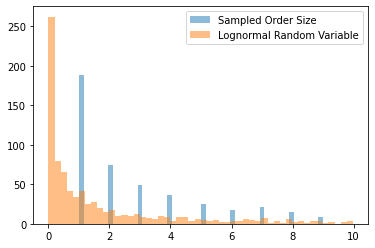

In [7]:
random_num = np.random.default_rng().lognormal(mean=0.0, sigma=2.5, size=10_00)
random_num_rounded = np.round(random_num)
random_num = random_num[random_num < 10]
random_num_rounded = random_num_rounded[random_num_rounded < 10]
random_num_rounded = random_num_rounded[random_num_rounded != 0]
print(f"Difference between level 1 and 2: {len(random_num_rounded[random_num_rounded == 1]) - len(random_num_rounded[random_num_rounded == 2])}")
plt.hist(random_num_rounded, bins=50, alpha=0.5, label="Sampled Order Size")
plt.hist(random_num, bins=50, alpha=0.5, label="Lognormal Random Variable")
plt.legend()
plt.savefig('result_plots/sampled_order_size.png', dpi=1200)
plt.show()